# Creazione screener evoluto su singolo asset

Architettura di un Hammer e di una Shooting Star senza conferma.

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ffn
import datetime

ticker = "CAT"
startdate = "2007-01-01"
enddate = "2020-11-10"

In [7]:
input_string = ticker + ":Open," + ticker + ":High," + \
               ticker + ":Low," + ticker + ":Close," + ticker + ":Volume"
input_string

'CAT:Open,CAT:High,CAT:Low,CAT:Close,CAT:Volume'

In [8]:
dataset =  ffn.get(input_string, start = startdate, end = enddate).apply(lambda x: round(x,2))
dataset.head(10)

,catopen,cathigh,catlow,catclose,catvolume
Date,,,,,
2007-01-03,61.71,62.31,60.70,61.16,6134800.0
2007-01-04,61.25,61.28,60.34,61.00,4058900.0
2007-01-05,60.77,60.92,59.95,60.22,6267100.0
2007-01-08,60.09,60.57,59.86,60.29,3942900.0
2007-01-09,60.46,60.70,60.00,60.62,3928300.0
2007-01-10,60.19,60.39,59.85,60.32,6825100.0
2007-01-11,60.14,60.58,59.90,60.00,7440900.0
2007-01-12,59.66,59.90,59.20,59.74,6560800.0
2007-01-16,59.87,59.93,59.10,59.24,6842100.0


In [9]:
dataset.columns = ["open","high","low","close","volume"]
dataset.tail(10)

,open,high,low,close,volume
Date,,,,,
2020-10-28,153.80,155.43,150.52,151.16,5645100.0
2020-10-29,150.60,155.51,149.63,154.67,3867200.0
2020-10-30,153.96,157.29,153.04,157.05,4373500.0
2020-11-02,159.20,163.85,157.65,163.27,4072400.0
2020-11-03,165.00,169.00,163.07,167.69,4843600.0
2020-11-04,159.18,162.38,155.23,155.23,9081700.0
2020-11-05,157.67,164.96,157.60,163.09,4821600.0
2020-11-06,163.94,165.54,160.76,161.29,2983000.0
2020-11-09,174.03,176.37,170.12,170.82,5969600.0


In [10]:
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()
%matplotlib inline

graph_title = ticker + " from " + str(dataset.index[0]) + " to " \
                                + str(dataset.index[-1]) + " - Powered by Gandalf Project R&D"
dataset.tail(100).iplot(kind = 'candle', theme = 'white',
                       up_color = 'green', down_color = 'red',
                       title = graph_title, xTitle = "Time", yTitle = "Prices")

In [11]:
dataset["range_perc"] = (dataset.high - dataset.low) / dataset.low * 100
dataset["open_pos"] = (dataset.open - dataset.low) / (dataset.high - dataset.low) * 100
dataset["close_pos"] = (dataset.close - dataset.low) / (dataset.high - dataset.low) * 100
dataset["SMA20"] = dataset.close.rolling(20).mean()
dataset["STD20"] = dataset.close.rolling(20).std()
dataset["BBU"] = dataset.SMA20 + 2 * dataset.STD20
dataset["BBL"] = dataset.SMA20 - 2 * dataset.STD20
dataset.dropna(inplace = True)
dataset.head(10)

,open,high,low,close,volume,range_perc,open_pos,close_pos,SMA20,STD20,BBU,BBL
Date,,,,,,,,,,,,
2007-01-31,63.14,64.34,62.98,64.07,9617800.0,2.159416,11.764706,80.147059,60.4300,1.318228,63.066457,57.793543
2007-02-01,64.80,65.25,64.45,64.99,10272800.0,1.241272,43.750000,67.500000,60.6215,1.662972,63.947444,57.295556
2007-02-02,65.00,65.37,64.55,65.25,5971000.0,1.270333,54.878049,85.365854,60.8340,1.959064,64.752127,56.915873
2007-02-05,65.25,65.30,64.31,64.49,5253400.0,1.539418,94.949495,18.181818,61.0475,2.115088,65.277677,56.817323
2007-02-06,64.50,64.95,64.32,64.42,4873100.0,0.979478,28.571429,15.873016,61.2540,2.235426,65.724853,56.783147
2007-02-07,64.90,65.90,64.65,65.64,6546300.0,1.933488,20.000000,79.200000,61.5050,2.433543,66.372086,56.637914
2007-02-08,65.58,65.85,64.86,65.63,4528600.0,1.526364,72.727273,77.777778,61.7705,2.582554,66.935608,56.605392
2007-02-09,65.99,65.99,64.69,64.80,5576200.0,2.009584,100.000000,8.461538,62.0105,2.631922,67.274345,56.746655
2007-02-12,64.75,65.18,64.28,64.60,4974700.0,1.400124,52.222222,35.555556,62.2535,2.635613,67.524726,56.982274


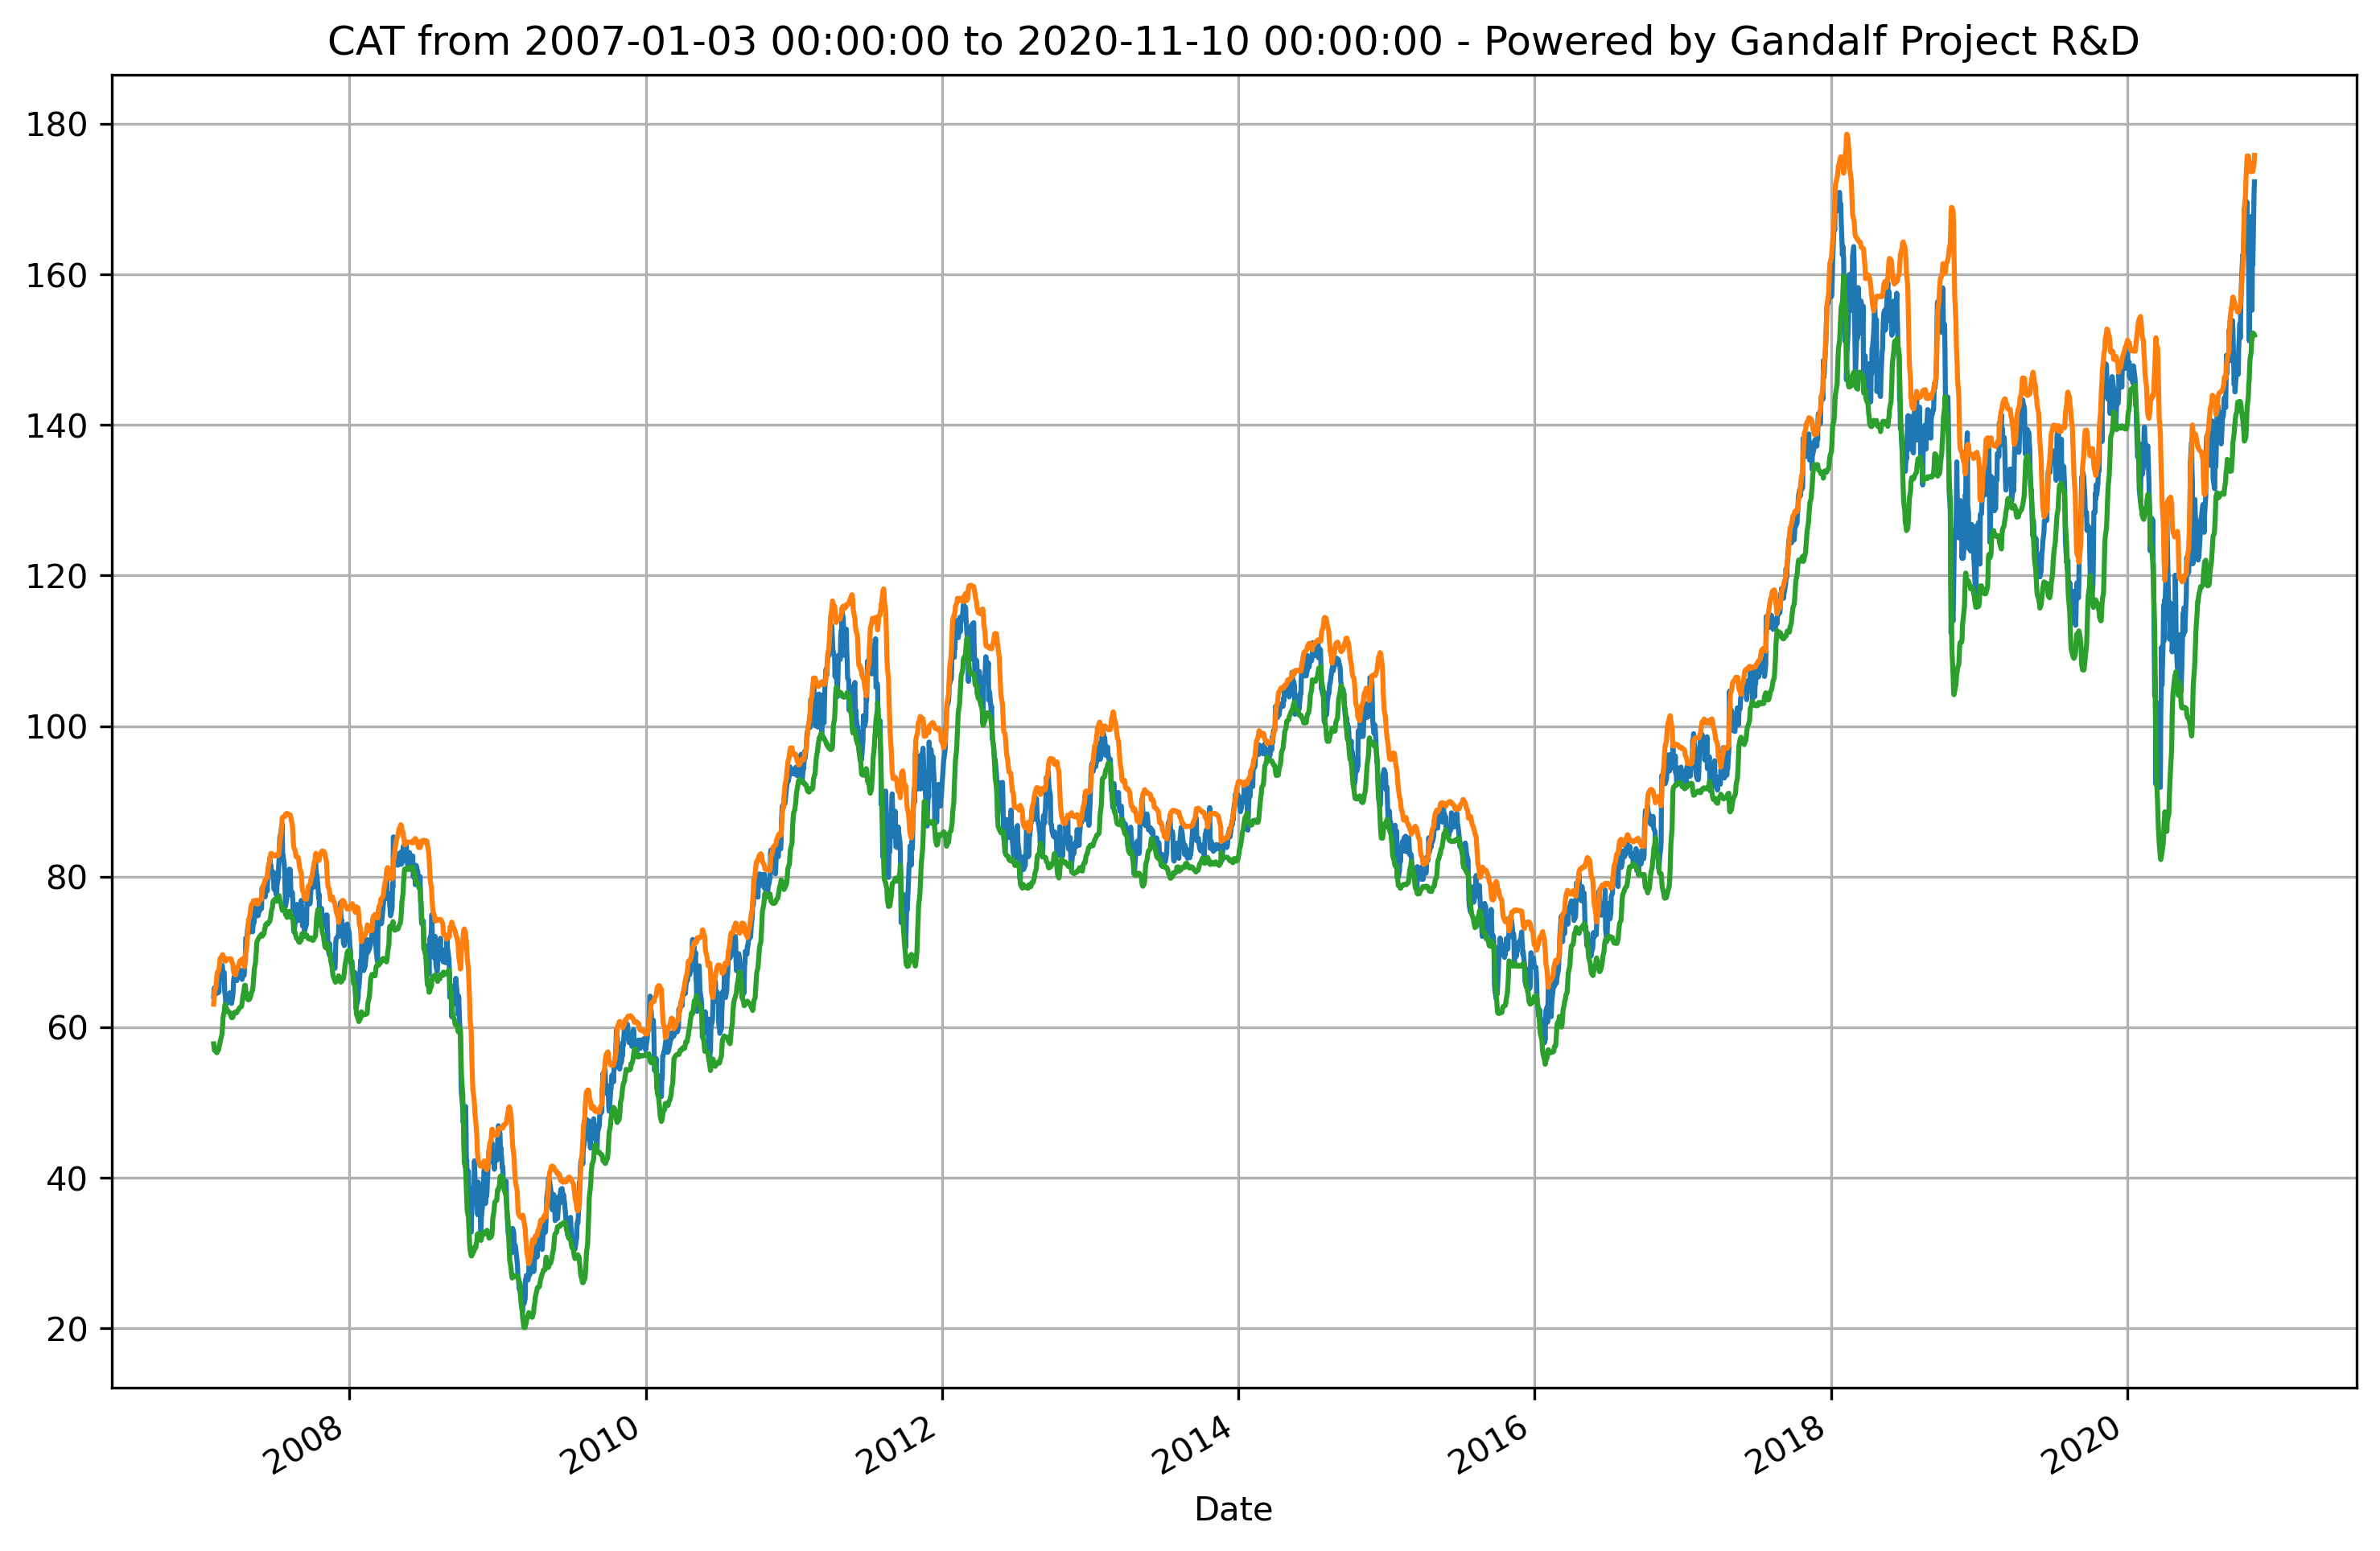

In [12]:
plt.figure(figsize = [12,8], dpi = 300)
plt.title(graph_title)
dataset.close.plot()
dataset.BBU.plot()
dataset.BBL.plot().grid()

# <span style="color:green">Esempio pattern "Hammer"</span>

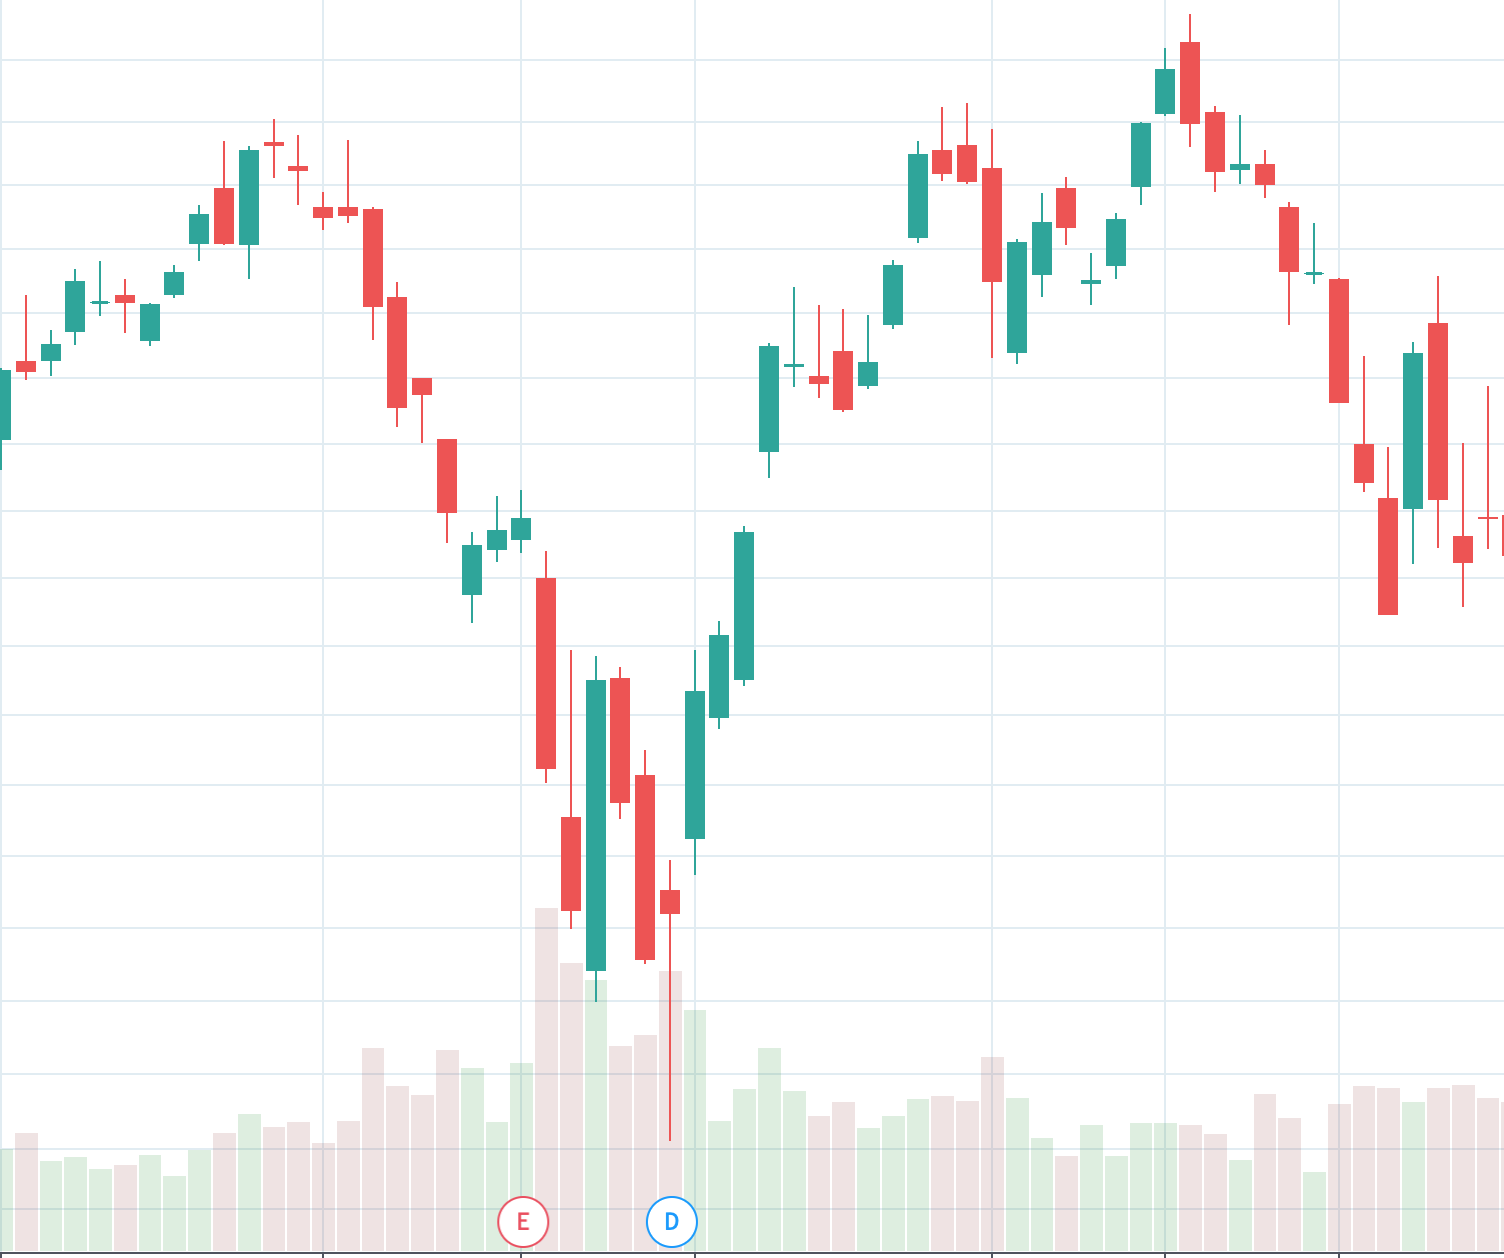

In [13]:
pattern = (dataset.low < dataset.BBL) & (dataset.close > dataset.BBL) & \
          (dataset.close_pos > 70) & (dataset.open_pos > 70) & (dataset.range_perc > 1)

Occurrences: 16 

DatetimeIndex(['2007-03-01', '2008-01-09', '2008-06-30', '2008-09-18',
               '2009-05-28', '2010-10-27', '2011-08-05', '2012-05-08',
               '2014-09-11', '2014-09-18', '2015-01-29', '2015-08-26',
               '2018-02-09', '2019-10-03', '2020-03-13', '2020-05-13'],
              dtype='datetime64[ns]', name='Date', freq=None) 

After: 1 days: 2.68 average of 0.17 with 11 winning trades and 5 loosing trades
After: 2 days: 11.93 average of 0.75 with 9 winning trades and 7 loosing trades
After: 3 days: 20.62 average of 1.29 with 10 winning trades and 6 loosing trades
After: 4 days: 19.76 average of 1.24 with 8 winning trades and 8 loosing trades
After: 5 days: 17.89 average of 1.12 with 10 winning trades and 6 loosing trades
After: 6 days: 18.5 average of 1.16 with 9 winning trades and 7 loosing trades
After: 7 days: 14.64 average of 0.92 with 9 winning trades and 7 loosing trades
After: 8 days: 27.21 average of 1.7 with 8 winning trades and 8 loosing 

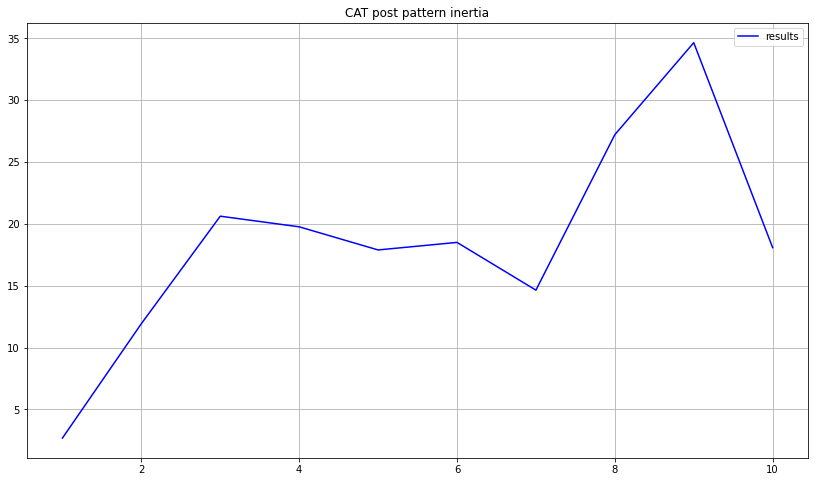

In [14]:
def pattern_stats(dataframe,pattern,direction,delay,ticker):
    """
    Function to calculate pattern stats
    """
    service = dataframe.copy()
    dates = service[pattern == True].index
    occurrences = service[pattern == True].count()[0]
    print("Occurrences:", occurrences, "\n")
    print(dates,"\n")
    results = []
    for i in range(0, delay):
        label = "st" + str(i)
        if direction == "long":
            service[label] = np.where(pattern.shift(1) == True, service.close.shift(-i) - service.open, np.nan)
        else:
            service[label] = np.where(pattern.shift(1) == True, -service.close.shift(-i) + service.open, np.nan)
        profit = round(service[label].sum(),2)
        avg_profit = round(profit / occurrences, 2)
        winning_trades = service[service[label] > 0].count()[0]
        loosing_trades = service[service[label] <= 0].count()[0]
        print("After:", i + 1,  "days:", profit, "average of", avg_profit, "with", winning_trades, "winning trades and", loosing_trades, "loosing trades")
        results.append(profit)
    plotting_results = pd.DataFrame(results, columns = ["results"], 
                                    index = range(1, delay + 1))
    plotting_results.plot(figsize = [14,8], color = "blue").grid()
    plt.title(ticker + " post pattern inertia")
    plt.show()
    return dates, plotting_results

results = pattern_stats(dataset,pattern,"long",10,ticker)

In [15]:
def plot_patterns(dataframe,results):
    """
    Function that plots every single pattern occurrence
    """
    for date in results:
        single_case = dataframe[(dataframe.index >= (date)) & \
                                (dataframe.index <= (date + pd.Timedelta(days = 20)))]    
        graph_title = ticker + " from " + str(single_case.index[0]) + " - Powered by Gandalf Project R&D"

        single_case.iplot(kind = 'candle',theme = 'white',
                          up_color = "green", down_color = "red",
                          title = graph_title, xTitle = "Time", yTitle = "Prices")
    return

plot_patterns(dataset,results[0])

# <span style="color:red">Esempio "Shooting Star"</span>

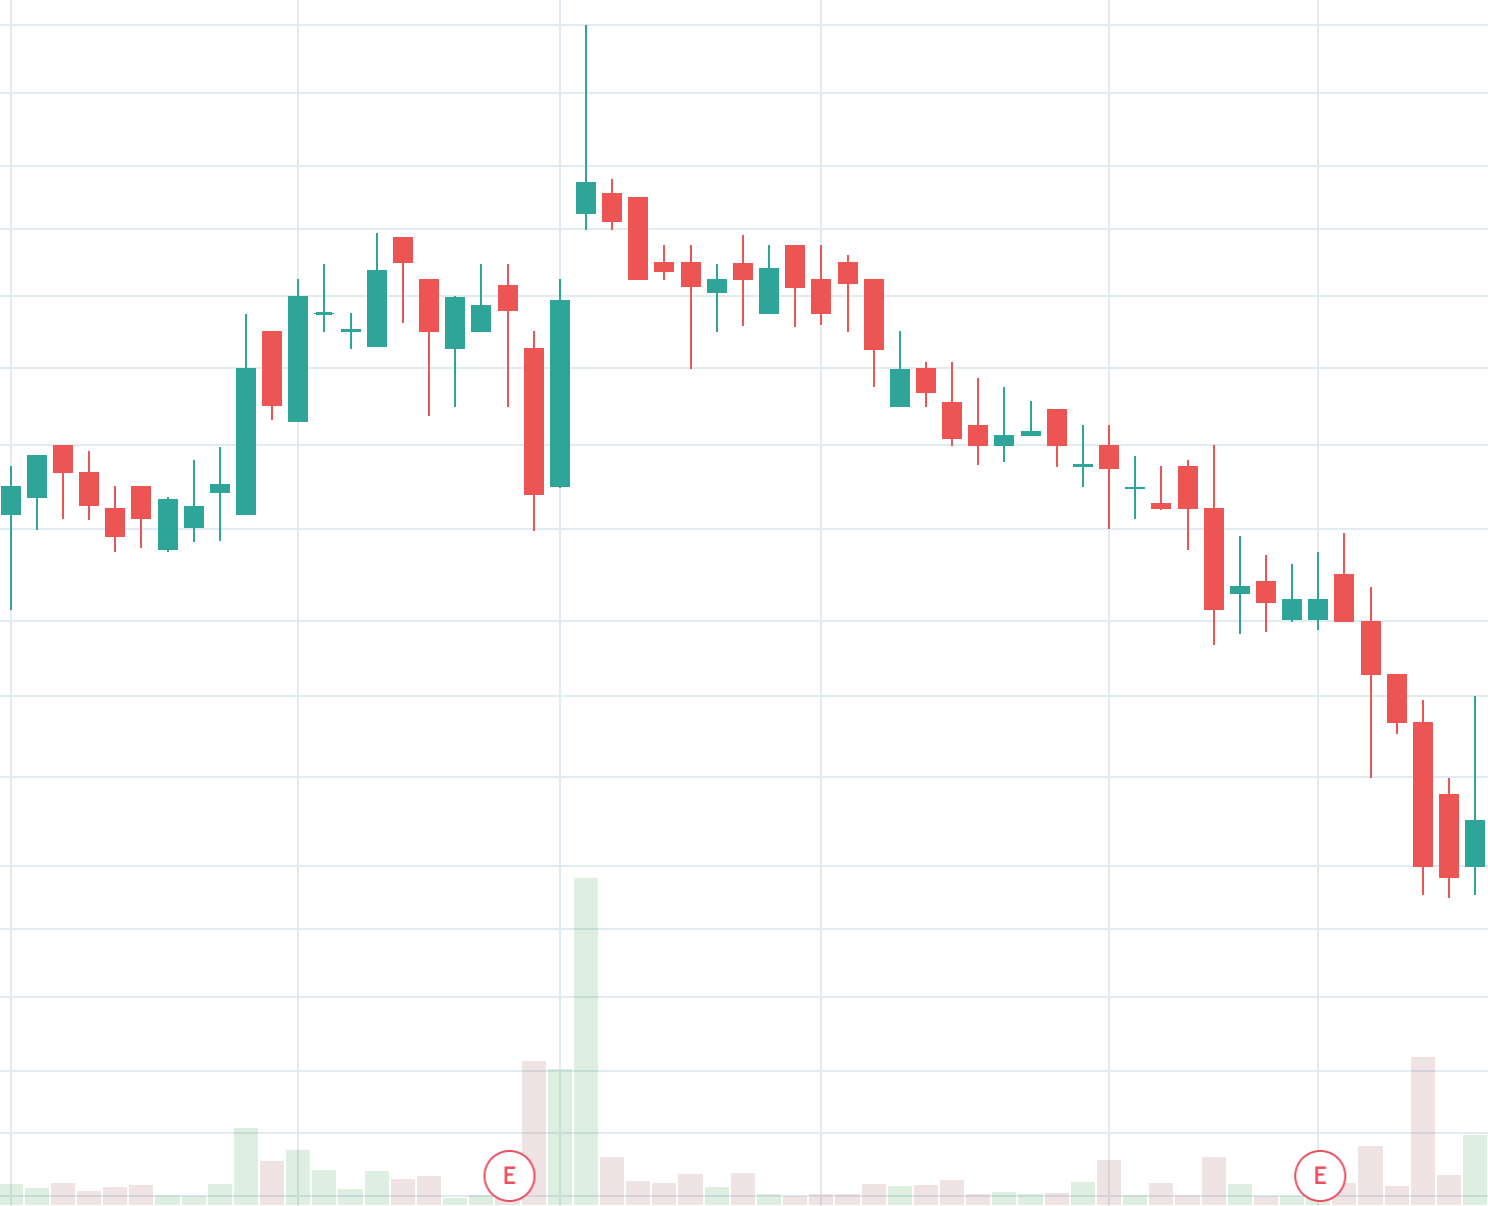

In [16]:
pattern = (dataset.high > dataset.BBU) & (dataset.close < dataset.BBU) & \
          (dataset.close_pos < 30) & (dataset.open_pos < 30) & (dataset.range_perc > 1)

Occurrences: 21 

DatetimeIndex(['2007-05-15', '2007-05-23', '2008-05-19', '2008-05-21',
               '2009-04-14', '2009-04-22', '2010-12-07', '2011-03-25',
               '2011-03-28', '2011-07-07', '2012-08-07', '2012-12-19',
               '2013-08-13', '2014-01-16', '2016-10-03', '2017-07-12',
               '2017-08-25', '2017-10-26', '2018-04-17', '2018-05-21',
               '2020-04-07'],
              dtype='datetime64[ns]', name='Date', freq=None) 

After: 1 days: 0.8 average of 0.04 with 14 winning trades and 7 loosing trades
After: 2 days: 2.41 average of 0.11 with 12 winning trades and 9 loosing trades
After: 3 days: 18.16 average of 0.86 with 15 winning trades and 6 loosing trades
After: 4 days: 15.4 average of 0.73 with 13 winning trades and 8 loosing trades
After: 5 days: 30.03 average of 1.43 with 14 winning trades and 7 loosing trades
After: 6 days: 17.63 average of 0.84 with 13 winning trades and 8 loosing trades
After: 7 days: 15.0 average of 0.71 with 12 winning

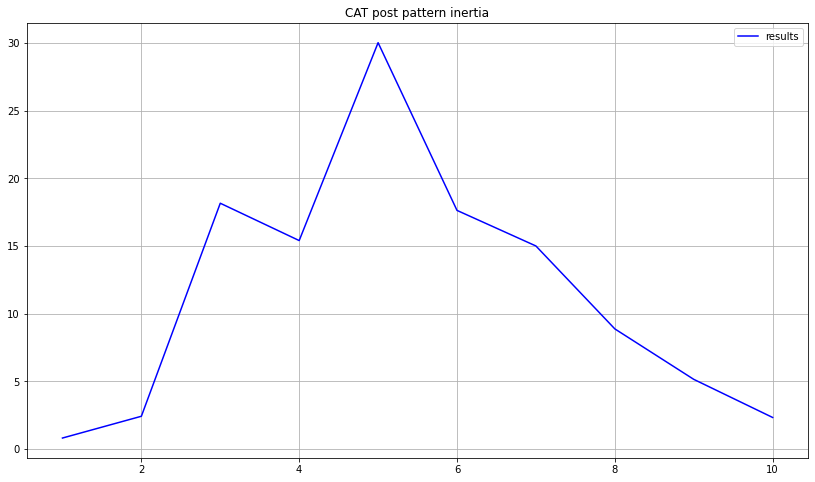

In [18]:
results = pattern_stats(dataset, pattern, "short", 10, ticker)

In [19]:
plot_patterns(dataset,results[0])